In [1]:
#importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [2]:
df=pd.read_excel("C:\\Users\\91865\\FlipRobo\\car_price.xlsx")
df

,Unnamed: 0,Name,Details,Manual/Automatic,Drove how much K M,Owner,Petrol and Diesel,EMI,Price
0,0,2016 Maruti Baleno,DELTA 1.2 K12 Manual,Manual,58181,2,Petrol,11042,496399
1,1,2014 Hyundai i10,MAGNA 1.1 IRDE2 Manual,Manual,32627,1,Petrol,7545,339199
2,2,2013 Maruti Ritz,ZXI Manual,Manual,13858,1,Petrol,8408,377999
3,3,2014 Hyundai i20,ASTA 1.2 Manual,Manual,9249,2,Petrol,9156,411599
4,4,2016 Hyundai Grand i10,SPORTS 1.2 VTVT Manual,Manual,23846,3,Petrol,8762,393899
5,5,2020 Tata Tiago,XZA+ 1.2 RTN Automatic,Automatic,87351,1,Petrol,13425,603499
6,6,2020 Hyundai VENUE,S MT 1.2 KAPPA Manual,Manual,6455,1,Petrol,19199,863099
7,7,2019 Maruti Ertiga,ZXI SMART HYBRID AT Automatic,Automatic,45813,1,Petrol,23214,1043599
8,8,2014 Honda Amaze,1.2 SAT I VTEC Automatic,Automatic,33535,1,Petrol,10482,471199
9,9,2013 Maruti A Star,VXI ABS AT Automatic,Automatic,54268,2,Petrol,6464,290599


In [3]:
#shape of the dataset
df.shape

(602, 9)

There are 602 rows and 9 colmns

In [4]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           602 non-null    int64 
 1   Name                 602 non-null    object
 2   Details              602 non-null    object
 3   Manual/Automatic     589 non-null    object
 4   Drove how much  K M  602 non-null    int64 
 5   Owner                602 non-null    int64 
 6   Petrol and Diesel    602 non-null    object
 7   EMI                  602 non-null    int64 
 8   Price                602 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 42.5+ KB


In [5]:
#describe the dataset
df.describe()

,Unnamed: 0,Drove how much K M,Owner,EMI,Price
count,602.000000,602.000000,602.000000,602.000000,6.020000e+02
mean,300.500000,38215.260797,1.181063,16566.556478,7.447512e+05
std,173.926709,30338.877221,0.418507,8309.726745,3.735638e+05
min,0.000000,71.000000,1.000000,5632.000000,2.531990e+05
25%,150.250000,18263.000000,1.000000,10948.000000,4.921740e+05
50%,300.500000,31613.500000,1.000000,14372.500000,6.461140e+05
75%,450.750000,50417.750000,1.000000,19003.000000,8.542990e+05
max,601.000000,353688.000000,3.000000,47848.000000,2.150999e+06


In [6]:
#drop unnamed column cause we alrady have index so we dont need it
df=df.drop(columns=['Unnamed: 0'])
df

,Name,Details,Manual/Automatic,Drove how much K M,Owner,Petrol and Diesel,EMI,Price
0,2016 Maruti Baleno,DELTA 1.2 K12 Manual,Manual,58181,2,Petrol,11042,496399
1,2014 Hyundai i10,MAGNA 1.1 IRDE2 Manual,Manual,32627,1,Petrol,7545,339199
2,2013 Maruti Ritz,ZXI Manual,Manual,13858,1,Petrol,8408,377999
3,2014 Hyundai i20,ASTA 1.2 Manual,Manual,9249,2,Petrol,9156,411599
4,2016 Hyundai Grand i10,SPORTS 1.2 VTVT Manual,Manual,23846,3,Petrol,8762,393899
5,2020 Tata Tiago,XZA+ 1.2 RTN Automatic,Automatic,87351,1,Petrol,13425,603499
6,2020 Hyundai VENUE,S MT 1.2 KAPPA Manual,Manual,6455,1,Petrol,19199,863099
7,2019 Maruti Ertiga,ZXI SMART HYBRID AT Automatic,Automatic,45813,1,Petrol,23214,1043599
8,2014 Honda Amaze,1.2 SAT I VTEC Automatic,Automatic,33535,1,Petrol,10482,471199
9,2013 Maruti A Star,VXI ABS AT Automatic,Automatic,54268,2,Petrol,6464,290599


In [7]:
#to check the null values in dataset
df.isna().sum()

Name                    0
Details                 0
Manual/Automatic       13
Drove how much  K M     0
Owner                   0
Petrol and Diesel       0
EMI                     0
Price                   0
dtype: int64

only manual/Automatic have the null values in it

In [8]:
#fill the null values of the column
#check the unique values in Manual/Automatic column
df['Manual/Automatic'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [9]:
#check the value count of Manual/Automatic column values
df['Manual/Automatic'].value_counts()

Manual       440
Automatic    149
Name: Manual/Automatic, dtype: int64

Manual count values is far more than automatic so we replace the null values to the manual value


In [10]:
#filling the null vaues in Manual/Automatic column
df['Manual/Automatic']=df['Manual/Automatic'].fillna('Manual')

In [11]:
#again check the null values of Manual/Automatic column
df['Manual/Automatic'].isna().sum()

0

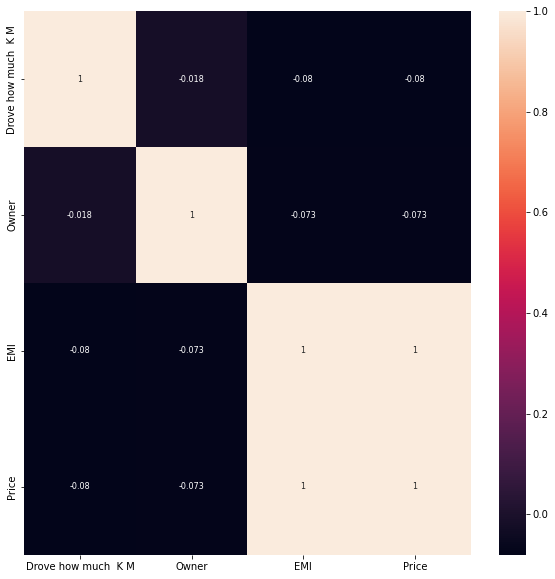

In [12]:
#check the correlation between columns in dataset
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":8})
plt.show()

In [13]:
#changing categorical values in integer for machine learning interpretation
def encoder(df):
    column=list(df.select_dtypes(include=['category','object']))  # we have taken aobject which will have a list of columns having category or object datatype
    le=LabelEncoder()                                             #instantiatinf Label Encoder()
    for feature in column:
        try:
            df[feature]=le.fit_transform(df[feature])
        except:
            print("Error code",feature)
    return df

In [14]:
df=df.drop(columns=['Name','Details'])
df

,Manual/Automatic,Drove how much K M,Owner,Petrol and Diesel,EMI,Price
0,Manual,58181,2,Petrol,11042,496399
1,Manual,32627,1,Petrol,7545,339199
2,Manual,13858,1,Petrol,8408,377999
3,Manual,9249,2,Petrol,9156,411599
4,Manual,23846,3,Petrol,8762,393899
5,Automatic,87351,1,Petrol,13425,603499
6,Manual,6455,1,Petrol,19199,863099
7,Automatic,45813,1,Petrol,23214,1043599
8,Automatic,33535,1,Petrol,10482,471199
9,Automatic,54268,2,Petrol,6464,290599


In [15]:
df

,Manual/Automatic,Drove how much K M,Owner,Petrol and Diesel,EMI,Price
0,Manual,58181,2,Petrol,11042,496399
1,Manual,32627,1,Petrol,7545,339199
2,Manual,13858,1,Petrol,8408,377999
3,Manual,9249,2,Petrol,9156,411599
4,Manual,23846,3,Petrol,8762,393899
5,Automatic,87351,1,Petrol,13425,603499
6,Manual,6455,1,Petrol,19199,863099
7,Automatic,45813,1,Petrol,23214,1043599
8,Automatic,33535,1,Petrol,10482,471199
9,Automatic,54268,2,Petrol,6464,290599


In [16]:
df['Manual/Automatic']=df['Manual/Automatic'].replace('Manual',1)


In [17]:
df['Manual/Automatic']=df['Manual/Automatic'].replace('Automatic',2)


In [18]:
#find the unique values in Petrol and Diesel column
df['Petrol and Diesel'].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG'], dtype=object)

In [19]:
df['Petrol and Diesel']=df['Petrol and Diesel'].replace('Petrol',1)
df['Petrol and Diesel']=df['Petrol and Diesel'].replace('Diesel',2)
df['Petrol and Diesel']=df['Petrol and Diesel'].replace('Petrol + CNG',3)

In [20]:
df

,Manual/Automatic,Drove how much K M,Owner,Petrol and Diesel,EMI,Price
0,1,58181,2,1,11042,496399
1,1,32627,1,1,7545,339199
2,1,13858,1,1,8408,377999
3,1,9249,2,1,9156,411599
4,1,23846,3,1,8762,393899
5,2,87351,1,1,13425,603499
6,1,6455,1,1,19199,863099
7,2,45813,1,1,23214,1043599
8,2,33535,1,1,10482,471199
9,2,54268,2,1,6464,290599


C:\Users\91865\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91865\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91865\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

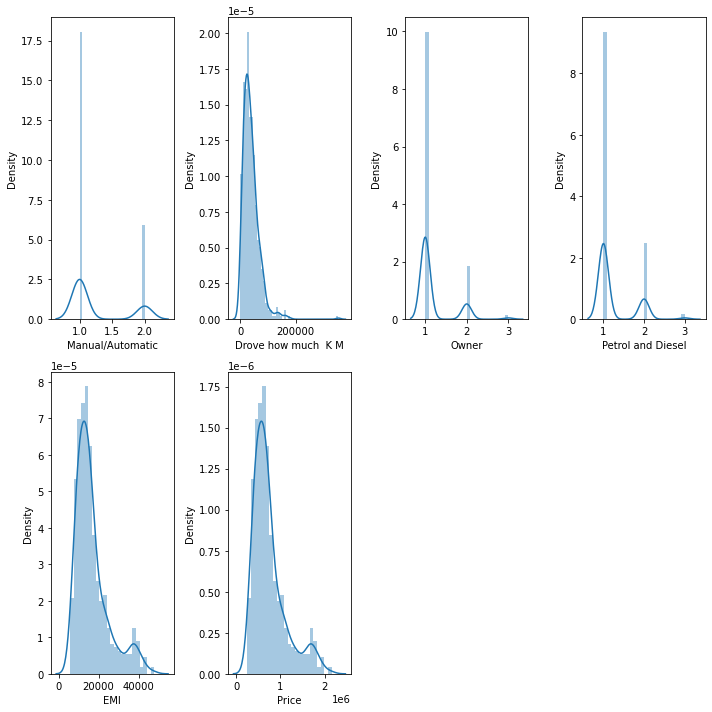

In [21]:
#lets check the data distribution for every column
plt.figure(figsize=(10,10))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [22]:
df

,Manual/Automatic,Drove how much K M,Owner,Petrol and Diesel,EMI,Price
0,1,58181,2,1,11042,496399
1,1,32627,1,1,7545,339199
2,1,13858,1,1,8408,377999
3,1,9249,2,1,9156,411599
4,1,23846,3,1,8762,393899
5,2,87351,1,1,13425,603499
6,1,6455,1,1,19199,863099
7,2,45813,1,1,23214,1043599
8,2,33535,1,1,10482,471199
9,2,54268,2,1,6464,290599


In [23]:
#check for skeness
df.skew()

Manual/Automatic       1.173047
Drove how much  K M    2.999027
Owner                  2.192071
Petrol and Diesel      1.677700
EMI                    1.487412
Price                  1.487406
dtype: float64

In [24]:
#now split in features and labels
x=df.drop(columns='Price')
y=df['Price']

In [25]:
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (602, 5)
shape of y (602,)


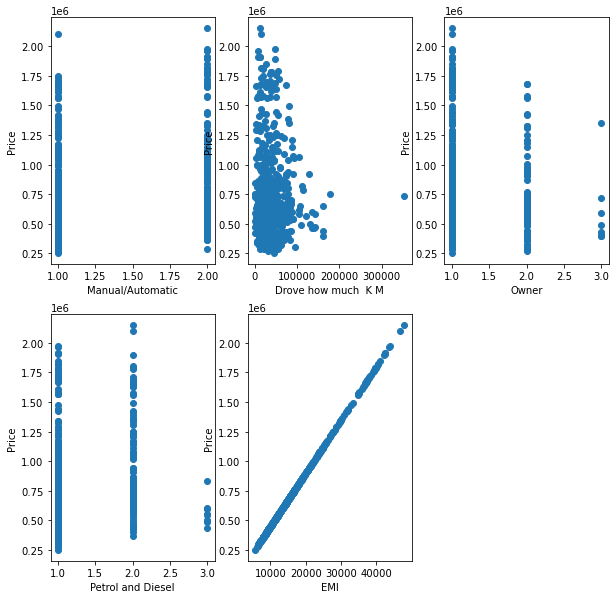

In [27]:
#check the relationship between labels and features
plt.figure(figsize=(10,10))
plotnumber=1
for column in x:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel("Price")
    plotnumber+=1
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
#data scling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [30]:
x_scaled.shape

(602, 5)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.50,random_state=123)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(301, 5)
(301,)
(301, 5)
(301,)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
#lets check how model fits the train dadta
lr.score(x_train,y_train)

0.9999999988575933

In [37]:
lr.score(x_test,y_test)

0.9999999986849064

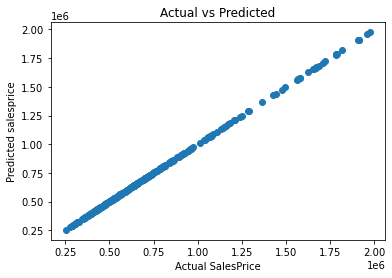

In [38]:
#lets plot and visulaize
plt.scatter(y_test,y_test)
plt.xlabel("Actual SalesPrice")
plt.ylabel("Predicted salesprice")
plt.title("Actual vs Predicted")
plt.show()

In [39]:
#### 2ndmodel training(Decision Tree model)

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [42]:
dt.score(x_train,y_train)

1.0

In [43]:
y_pred_dt=dt.predict(x_test)

In [44]:
y_pred_dt

array([ 842399.,  528199.,  628799.,  734899.,  383899.,  696399.,
        546499., 1637699.,  743699.,  422299.,  714349., 1104999.,
       1089049.,  483499.,  551499.,  752999.,  759799.,  724499.,
        623399.,  741999.,  858999.,  478299.,  562599.,  705999.,
        696399.,  436799.,  379199.,  431399.,  471399., 1051799.,
       1613699.,  558899.,  820899.,  294099.,  623399.,  528199.,
        319299.,  319299.,  436799.,  914899.,  766399., 1152799.,
        584999.,  681699.,  291799.,  294099., 1051799., 1692199.,
        401799.,  635918.,  431399.,  604099.,  514999.,  556899.,
        734899.,  966899.,  714349.,  562599., 1846599.,  783599.,
        838199., 1661099.,  881349.,  734599.,  728999.,  436799.,
        743699., 1432699., 1051799.,  412199.,  703064.,  854299.,
        471399.,  642249.,  562599.,  858999.,  393899.,  478299.,
        756399.,  660199.,  772999.,  607099.,  724499.,  663999.,
        533199.,  436799.,  483499.,  309299.,  677553.,  4506

In [45]:
dt.score(x_test,y_test)

0.9983600444949804

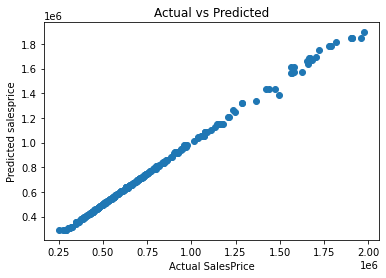

In [46]:
#lets plot and visulaize
plt.scatter(y_test,y_pred_dt)
plt.xlabel("Actual SalesPrice")
plt.ylabel("Predicted salesprice")
plt.title("Actual vs Predicted")
plt.show()

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
#predicting 
y_rf=rfr.predict(x_test)
print(y_rf)

[ 837251.    528660.    636979.97  733922.5   385084.56  698595.25
  547936.   1661928.    751271.    421247.    711064.8  1107450.
 1077837.5   484015.5   555417.6   753530.    761651.    726578.
  621984.    741705.    860330.5   474426.    562263.    705043.4
  694937.3   439037.    377502.52  432417.    472789.   1053584.5
 1620896.    558939.    816199.26  294288.    621975.    527917.5
  320093.    318003.    436089.    923832.5   765606.   1144436.
  584764.    684050.54  295287.    293974.   1054721.5  1701475.
  401314.    629031.28  430731.    605180.    513521.    556897.2
  735421.5   968313.    716353.15  562095.   1890890.    784397.
  835162.   1663549.    880568.    733442.5   730455.5   438939.
  742905.   1422054.   1057494.5   411914.25  703974.7   854412.
  472646.    641662.57  562308.    862686.    393178.62  477259.
  755256.    660373.    771987.    609873.    726601.65  664571.5
  533489.    436089.    482753.    311486.    679171.52  455983.
  398748.29 158278

In [50]:
rfr.score(x_train,y_train)

0.9998645457764004

In [51]:
rfr.score(x_test,y_test)

0.9993723687585019

Object `#lets plot and visulaize` not found.


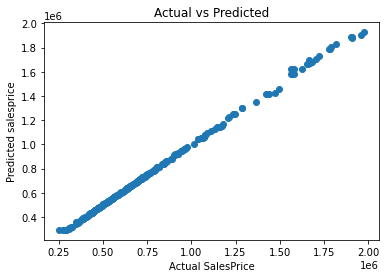

In [52]:
?#lets plot and visulaize
plt.scatter(y_test,y_rf)
plt.xlabel("Actual SalesPrice")
plt.ylabel("Predicted salesprice")
plt.title("Actual vs Predicted")
plt.show()

#### Hyperparameter tuning of random forest regressor model

In [54]:
n_estimators=[10,500]
max_features=['auto','sqrt']
max_depth=[2,4]
min_samples_split=[2,4]
min_samples_leaf=[1,2]
bootstrap=[True,False]

In [55]:
#create the random grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [57]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [58]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 500]},
             verbose=2)

In [59]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

In [60]:
rf_grid.score(x_train,y_train)

0.9981996153876943

In [61]:
rf_grid.score(x_test,y_rf)

0.9984695971815084

In [62]:
import pickle

In [63]:
filename = 'finalized2_model.pkl'
pickle.dump(rf_grid, open(filename, 'wb'))